# Homework 02:  Linear Regression in Theory and Practice

In this homework, you’ll work with a simple synthetic regression dataset generated using scikit-learn’s make_regression function. Synthetic data is a valuable tool for testing modeling workflows, gaining hands-on experience with regression models, and understanding how factors like noise and training set size impact model performance—particularly when measured by metrics like Mean Squared Error (MSE). Because we control how the dataset is generated, we can directly assess how well our model recovers the underlying patterns. You’ll also practice splitting data into training and test sets to evaluate how well your model generalizes to unseen data.

Some questions will require you to consult the scikit-learn documentation. These functions are widely used in machine learning, and becoming comfortable with reading documentation and examples is an essential part of developing fluency with the tools.

As in the first assignment, some tasks are not graded, but that doesn’t mean they are optional. Skipping these steps will weaken your understanding and reduce the long-term value of your effort. Treat every part of the homework seriously—you’ll thank yourself later when you take on real-world projects and more advanced modules.

There are 16 problems, each worth 3 points, and you get 2 points for free (if you complete the assignment!). 


In [5]:
# Useful imports and utilities

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
import kagglehub
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing,make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from math import isclose

# globals

random_state = 42


## Problem One: Generate and Visualize a Simple Univariate Regression Dataset

In this problem, you’ll explore scikit-learn’s `make_regression` function, which generates synthetic datasets for testing regression models. You can control key parameters like the number of samples and the noise level (standard deviation of the errors), though some settings—such as the feature value ranges or the true coefficients—are randomly generated or limited in configurability (e.g., you can set the bias, but not the coefficients directly).

Despite these quirks, `make_regression` is widely used for prototyping and examining model behavior under controlled conditions.

Before you begin, take a moment to read the [scikit-learn documentation for `make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) to understand its parameters and capabilities.



### Generate a Univariate Dataset

Use `make_regression` to generate a simple univariate regression dataset with the following parameters:

* `n_samples=20`
* `n_features=1` (implied for univariate)
* `noise=20` (this sets the standard deviation of the errors)
* `bias=0.5` (this sets the y-intercept)
* `random_state=42` (for reproducibility)
* `coef=True` (this returns the underlying model’s coefficients)

Note that when `coef=True`, the function returns a tuple with three values: `X`, `y`, and the  coefficients (in this case, just the slope). Refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) to understand the return format.



In [6]:
# Your code here (you may add additional cells if you wish)

X, y, coef = make_regression(
    n_samples=20,
    n_features=1,
    noise=20,
    bias=0.5,
    random_state=42,
    coef=True
)

### Part A

**TODO:** Set `a1a` to the range of `X`, i.e., a tuple `(lb,ub)` (or array) where `lb` is the smallest value in `X` and `ub` is the largest.  

In [7]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a1a = (X.min(), X.max())  # Replace 0,0 with an expression returning the range

In [8]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a1a = {a1a}')                   

a1a = (np.float64(-1.913280244657798), np.float64(1.5792128155073915))


### Part B

**TODO:** Set `a1b` to the slope of the underlying model.

Hint: `make_regression` will return the coefficients as an array with one fewer dimensions than `X`; in this case, it is a 0-dimension array whose shape is `()`.  Weird, I know, but this is unusual.  You can pretend it is just a float. 

In [9]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a1b = coef   # Replace 0 with an expression returning the slope

In [10]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a1b = {a1b:.4f}')           # Will print to 4 decimal places        

a1b = 45.6070


### Visualizing the Data (Nothing for you to do but think about it!)

The following will create a plot of the dataset, with the regression line (given by the bias and the slope).

**Note:** You will need to complete the previous cell for this to be correct! 


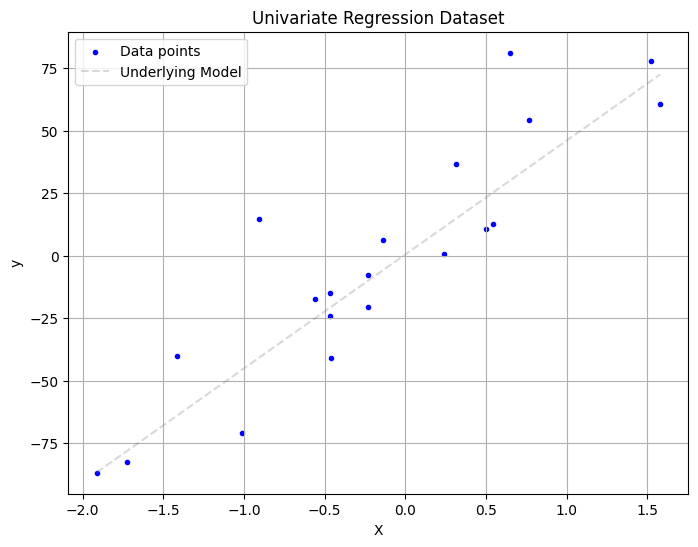

In [12]:
# Plot the data points and the regression line

if a1b != 0:        # If you answered the previous questions!

    bias = 0.5

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue',label="Data points",marker='.')
    plt.plot(a1a,[bias+a1b*a1a[0],bias+a1b*a1a[1]], color="grey", alpha=0.3,label="Underlying Model",linestyle='--')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Univariate Regression Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()

## Problem Two: Run Linear Regression on the Data Set and Evaluate the Results

Now we will use `sklearn`'s `LinearRegression` model to create a model from the dataset. Of course, the **underlying model** has already been
created, but your linear regression won't know that, and it has to determine the best model given the data samples it has.

### Part A: Create and Evaluate a Linear Model

**TODO:** 

- Create a linear regression model called simply `model` and train it on `X,y`. 
- Set `a2a` to the bias/y-intercept of the model.            


In [13]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

model = LinearRegression()
model.fit(X, y)

a2a = model.intercept_   # Replace 0 with an expression returning the bias

In [14]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2a = {a2a:.4f}')           # Will print to 4 decimal places        

a2a = 5.2857


### Part B

**TODO:** 

- Set `a2b` to the slope of the model.
- Hint: The coefficients are returned as a 1-dimensional array (unlike `make_regression`!), so you'll need to turn a 1-element array into a scalar. 


In [17]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a2b = model.coef_[0]   # Replace 0 with an expression returning the slope

In [18]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2b = {a2b:.4f}')           # Will print to 4 decimal places        

a2b = 45.7125


### Part C

**TODO:** 

- Set `a2c` to the **training MSE** of the model on the dataset.
- Hint: generate an array `y_pred` by using the model to predict the targets from the original `X`, then calculate the mean squared error using the appropriate `sklearn` function.  (Now might be a good time to look at that first code cell to see what I imported for you.)


In [19]:
# Your answer here, NOT in the next cell

a2c = mean_squared_error(y, model.predict(X))   # Replace 0 with an expression returning the training mse

In [20]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2c = {a2c:.4f}')           # Will print to 4 decimal places        

a2c = 436.9130


### Part D

**TODO:** Set `a2d` to the coefficient of determination ($R^2$) of the model (read the docs!).


In [21]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a2d = model.score(X, y)   # Replace 0 with an expression returning the r2 score

In [22]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a2d = {a2d:.4f}')           # Will print to 4 decimal places        

a2d = 0.8072


### Visualizing The Model (Nothing for you to do but think about it!)

We now provide a visualization of the regression line by  adding a plot of the model's regression line in red. 


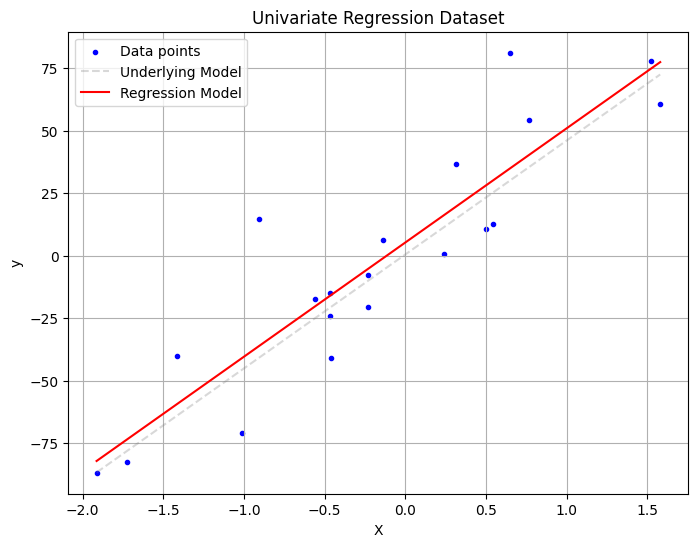

Underlying model = 0.5 + 45.607 * x
Linear model     = 5.2857 + 45.7125 * x
MSE              = 436.9130
R^2              = 0.8072


In [24]:
# Plot the data points and the regression line

if a2d != 0:     # If you answered the previous questions!

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue',label="Data points",marker='.')
    plt.plot(a1a,[bias+a1b*a1a[0],bias+a1b*a1a[1]], color="grey", alpha=0.3,label="Underlying Model",linestyle='--')
    plt.plot(a1a,[model.intercept_+model.coef_[0]*a1a[0],model.intercept_+model.coef_[0]*a1a[1]], color="red", label="Regression Model")
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Univariate Regression Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Just some stats
    print(f'Underlying model = {np.around(bias,4)} + {np.around(a1b,4)} * x')
    print(f'Linear model     = {np.around(model.intercept_,4)} + {np.around(model.coef_[0],4)} * x')
    print(f'MSE              = {mean_squared_error(y,model.predict(X)):.4f}')
    print(f'R^2              = {np.around(model.score(X, y),4):.4f}')


### Pause and Ponder (no need to write answers, just think about these):  
- Why does the linear regression line not match the underlying model?
- Which parameters (`bias`, `n_samples`,`noise`) do you think affect how well the regression model matches the actual model?
- What changes to these parameters would result in a more accurate match between underlying and regression models?

## Problem Three:  How well does it generalize?

The **most important issue** in making useful models is to ensure that they are able to **generalize to new data from the same domain.**  For example, if you create a model from a housing price dataset, 
you want it to be able to predict what price could be obtained if you build new houses with particular features. You will learn techniques for judging how well models generalize in
the next few lessons, and it will continue to be a crucial issue going forward. 

For now, since we have the underlying model (which never happens IRL!) we can easily create new data samples with the same characteristics as the set we used for training. 


### Part A

**TODO:** 

- Complete the following stub to create a function to create new points to add the data set, with all the same parameters as the underlying model, following these steps:
    1. Create a random number within the existing range of`X`, using `np.random.uniform` 
    2. Use the bias and slope of the underlying model to find the point (x,y) on the regression line (which is the prediction for y given x)
    3. Return (x,y)

- Test it by running the cell repeatedly to see the results (we are not setting a random seed, so it will generate random answers)

- Generate 5 new data points (we'll use these below as a **test set**) and assign them to ndarrays `X_new` and `y_new` 
- Hint: create a list of pairs and split using `zip(* ...)`

- Set `a3a` to the first 2 values in `X_new`.


In [25]:
# Your code here (add additional cells if you wish)

def generate_new_point():
    x_new = np.random.uniform(X.min(), X.max())  # Step 1: Random x within range
    y_new = a2b * x_new + a2a  # Step 2: Compute y using slope and intercept
    return x_new, y_new

new_points = [generate_new_point() for _ in range(5)]
X_new, y_new = np.array(list(zip(*new_points)))

In [26]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a3a = X_new[:2]   # Replace [] with an expression returning the first two values in X_new

In [27]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3a = {a3a}')                

a3a = [ 0.0471018 -0.0832414]


### Visualize the Data (Nothing for you to do but think about it!)

We now add our new data points in green, in addition to what we displayed in Problem Two. 


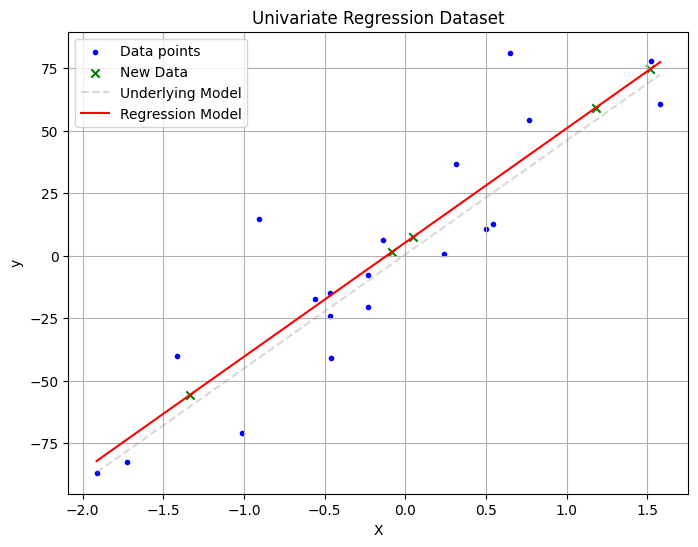

In [28]:
# Plot the data points and the regression line

if len(a3a) > 0:        # If you answered the previous questions!

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue',label="Data points",marker='.')
    plt.scatter(X_new, y_new, color='green',label="New Data",marker='x')
    plt.plot(a1a,[bias+a1b*a1a[0],bias+a1b*a1a[1]], color="grey", alpha=0.3,label="Underlying Model",linestyle='--')
    plt.plot(a1a,[model.intercept_+model.coef_[0]*a1a[0],model.intercept_+model.coef_[0]*a1a[1]], color="red", label="Regression Model")
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Univariate Regression Dataset")
    plt.legend()
    plt.grid(True)
    plt.show()


### Part B

**TODO:** 

- Assign the MSE on the new data to `a3b` (we'll later call this the "test MSE").
- Hint: When you "roll your own" datasets using ndarrays, you will generally have to reshape them using `.reshape(-1,1)` because `sklearn` models expect a column array, not a "normal" array. 


In [35]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)
y_new = y_new.reshape(-1, 1)
a3b = mean_squared_error(y_new, model.predict(y_new))   # Replace 0 with an expression returning the mse

In [36]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3b = {a3b:.4f}')           # Will print to 4 decimal places        

a3b = 4896977.6440


### Part C:  Let's Compare Metrics

We now have three related values:
- Noise = standard deviation of "errors" between the data and the underlying model 
- Training MSE of the linear model on the dataset 
- Testing MSE of the linear model on new data generated with the same parameters as the original dataset

**TODO:**  Answer the following multiple-choice problems by assigning the variable to the  **most accurate** statement.

#### C1) Comparing the Two MSEs

Why might the training MSE be *larger* than the testing MSE in this scenario?

1. These should be exactly the same, so there must have been an error somewhere.  
2.  With only 20 training points, a few unusual data points (outliers) can increase the average training error; meanwhile, the small test set of 5 points could *by chance* lead to smaller errors overall.  
3. There is always a positive bias in the regression line, so it will always be larger. 
4.  There is very little relationship between these two numbers, so the fact that they are close to each other must be an accident.  

In [37]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a3c1 = 2            # Replace the 0 with one of 1, 2, 3, 4 

In [38]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3c1 = {a3c1}')                

a3c1 = 2


#### C2) Understanding the Noise Parameter
 
Suppose a dataset has been generated using `make_regression` with `noise = 20`.  

Which statement best explains the significance of the noise parameter when interpreting the MSE of models trained on this dataset?  

1. The square of the noise parameter, $20^2 = 400$, represents the irreducible noise in the data; no model can achieve an MSE lower than this on average.  
2. A noise standard deviation of 20 means the MSE can eventually be reduced to 0 with enough data.  
3. MSE measures the *average* absolute errors, so having $\sigma = 20$ implies the MSE will always equal 20.  
4. If the noise is 20, then it’s possible to create a model with training and testing MSEs that are *exactly* 400 with sufficient effort.  


In [25]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a3c2 =  0              # Replace the 0 with one of 1, 2, 3, 4 

In [26]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3c2 = {a3c2}')             

a3c2 = 0


#### C3) The Role of Dataset Size

You fitted a linear model on **20** training points and tested it on **5** new points, both drawn from a process with noise standard deviation 20 (variance 400).  

What would happen if we repeated the same experiment with more training/testing points or with even fewer points?  
In other words, **how does dataset size affect the measured MSE values?**

1.  If the training set is small, the MSE will always be *exactly* 400 for both training and test sets, since there’s too little data to deviate from the noise variance.  

2.  Collecting more data actively *lowers* the true noise standard deviation from 20 to something smaller, guaranteeing an MSE below 400.  
3. If you have fewer than 30 data points, the training MSE must always exceed 400 and the test MSE must always be *less* than 400.  
4. Small sample sizes can cause large swings in MSE, sometimes pushing the training MSE above 400 while letting a tiny test set fall below 400 by chance. With larger datasets, the MSE typically stabilizes closer to 400.  

In [27]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a3c3 = 0              # Replace the 0 with one of 1, 2, 3, 4 

In [28]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a3c3 = {a3c3}')             

a3c3 = 0


## Problem Four: Linear Regression on an Actual Dataset (finally!)

Let's consider applying what we have learned to an actual dataset, the Diabetes dataset from Kaggle. This has 10 features and 1 target,
so it is an instance of **multiple regression**, however we can train a model almost exactly as we did in the univariate case. 

After doing a bit of EDA and massaging of the features, we will first consider separate regressions on a single feature of the dataset, and then run multiple regression on the whole set. 

In [29]:
# Download Kaggle Diabetes Dataset

from sklearn.datasets import load_diabetes

data_diabetes = load_diabetes(as_frame=True)
df_diabetes = pd.concat([data_diabetes.data, data_diabetes.target.rename('DiseaseProgression')], axis=1)

feature_names = df_diabetes.drop(columns=["DiseaseProgression"]).columns.tolist()

df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [30]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 442 non-null    float64
 1   sex                 442 non-null    float64
 2   bmi                 442 non-null    float64
 3   bp                  442 non-null    float64
 4   s1                  442 non-null    float64
 5   s2                  442 non-null    float64
 6   s3                  442 non-null    float64
 7   s4                  442 non-null    float64
 8   s5                  442 non-null    float64
 9   s6                  442 non-null    float64
 10  DiseaseProgression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


#### Features of the Diabetes Dataset

- **age**: age of the patient  
- **sex**: gender of the patient  
- **bmi**: body mass index (BMI)  
- **bp**:  mean blood pressure  
- **s1**:  measure of serum cholesterol levels  
- **s2**:  measure related to low-density lipoproteins (LDL)  
- **s3**:  measure of high-density lipoproteins (HDL)  
- **s4**:  measure of total cholesterol-to-HDL ratio  
- **s5**:  measure of serum triglycerides  
- **s6**:  measure of blood sugar levels  
- **DiseaseProgression**: Quantitative measure of diabetes disease progression one year after baseline (target variable)  



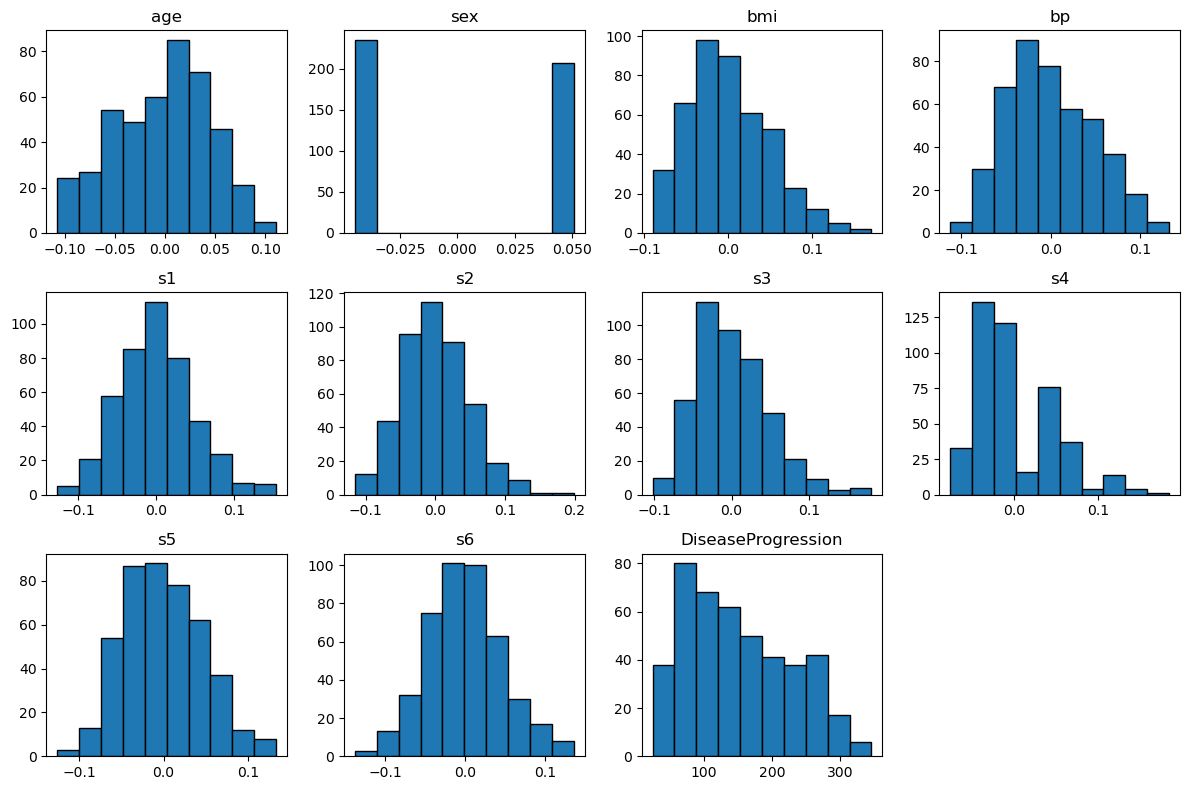

In [31]:
# Always useful to create histograms of the features when possible; the layout and formatting are sometimes awkward, so
# I use the following:

df_diabetes.hist(figsize=(12,8), layout=(3,4),grid=False,edgecolor='black')
plt.tight_layout()
plt.show()

### Part A

**TODO:** 

- In order to avoid any awkward moments when discussing the dataset, `rename` the column name 'sex' to 'gender'
  *in-place* and set the variable `a4a` to a numpy array of the feature/column names.
- Hint: if your answer starts `Index(...` then you have a Pandas data structure and not an ndarray as required. 


In [32]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)


a4a = []               # Replace the [] with appropriate ndarray

In [33]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4a = {a4a}')             

a4a = []


### Part B

**TODO:** 

- Create dataset in the form `X,y` from the dataframe by dropping the last column to create `X`, and just selecting the last column to make `y`

- Note: `sklearn`'s models are perfectly happy to work with dataframes, so we can just keep them as such and not convert to ndarrays.  Two advantages are: you don't have to reshape for input to the model, and you keep the feature names in case you need them later, e.g., when doing feature selection. 

- Set `a4b` to the shape of `X`


In [34]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)


a4b = 0,0                  # Replace 0,0 with the shape of X

In [35]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4b = {a4b}')                

a4b = (0, 0)


### Part C: Training and Testing for Generalization

We will spend the next two lessons thinking about how to evaluate  models for generalization, but let's try a naive strategy
for now:  We will split the dataset into training and testing sets, and see how the model performs on  data it has never seen.
The disadvantage of this is that we have less training data, of course!

**TODO:** 

- Use `sklearn`'s `train_test_split` to shuffle `X` and split it into 80% training data and 20% testing data with `random_state=42`
- Train a model `model_diabetes` on the training set, and then test it on the same set to find the training MSE. 
- Assign the training MSE to `a4c`.

In [36]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)



a4c = 0              # Replace the 0 with the training mse

In [37]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4c = {a4c:.4f}')             # Will print to 4 decimal places

a4c = 0.0000


### Part D

**TODO:** 

- Run the model created in Part C on the testing set to determine the test MSE. 
- Set `a4d` to the test MSE.

In [38]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)


a4d =  0              # Replace the 0 with the test mse

In [39]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4d = {a4d:.4f}')         # Will print to 4 decimal places

a4d = 0.0000


### Part E

**TODO:** 

Now try setting the percentage of the test size to different values, perhaps 0.1, 0.2, 0.3, 0.4, and 0.5 and run the above
cells and observe the training and testing MSEs. 

Then choose the best answer below. 


**How Does the Training‐Set Size Affect MSE?**

1.  Both **training MSE** and **testing MSE** remain exactly the same regardless of how many points you use, provided you keep the `random_state` fixed.  
2.  Both **training MSE** and **testing MSE** steadily converge to **zero** once you exceed a certain training‐set size threshold (e.g., 30 points).  
3.  **Training MSE** usually goes **up** slightly with a bigger training set (it’s harder to fit more points perfectly), but **testing MSE** tends to go **down** (the model generalizes better with more data).  
4.  Both **training MSE** and **testing MSE** decrease when the training set grows, because the model memorizes a larger volume of data and thus reduces all errors.


**NOTE: Before submitting your homework, set the percentage back to 20% as in the original problem and remember to Run All!**

In [40]:
# Your answer here, NOT in the next cell (you may add additional cells if you wish)

a4e = 0           # Replace the 0 with one of 1, 2, 3, 4 


In [41]:
# Graded Answer
# DO NOT change this cell in any way          

print(f'a4e = {a4e}') 

a4e = 0
